In [1]:
import warnings
warnings.filterwarnings('ignore')
import re
import math as m
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.feature_selection import chi2, SelectKBest

from sklearn.cross_validation import train_test_split,KFold

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

from sklearn import metrics
from sklearn.metrics import auc, accuracy_score,roc_auc_score,confusion_matrix,classification_report,fbeta_score,make_scorer


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train_data = pd.read_csv("carvan_train.csv")
test_data = pd.read_csv("carvan_test.csv")
print("Shape of training data set:{}".format(train_data.shape))
print("Shape of test data set:{}".format(test_data.shape))

Shape of training data set:(5822, 86)
Shape of test data set:(4000, 85)


In [3]:
test_data["V86"] = np.nan

train_data["data"] = "train"
test_data["data"]  = "test"

test_data = test_data[train_data.columns]
all_data  = pd.concat([train_data, test_data], axis=0)

all_data.shape

(9822, 87)

In [4]:
all_data.dtypes

V1        int64
V2        int64
V3        int64
V4        int64
V5        int64
V6        int64
V7        int64
V8        int64
V9        int64
V10       int64
V11       int64
V12       int64
V13       int64
V14       int64
V15       int64
V16       int64
V17       int64
V18       int64
V19       int64
V20       int64
V21       int64
V22       int64
V23       int64
V24       int64
V25       int64
V26       int64
V27       int64
V28       int64
V29       int64
V30       int64
         ...   
V58       int64
V59       int64
V60       int64
V61       int64
V62       int64
V63       int64
V64       int64
V65       int64
V66       int64
V67       int64
V68       int64
V69       int64
V70       int64
V71       int64
V72       int64
V73       int64
V74       int64
V75       int64
V76       int64
V77       int64
V78       int64
V79       int64
V80       int64
V81       int64
V82       int64
V83       int64
V84       int64
V85       int64
V86     float64
data     object
Length: 87, dtype: objec

In [5]:
all_data.nunique(dropna=False)

V1      40
V2       9
V3       6
V4       6
V5      10
V6      10
V7      10
V8       6
V9      10
V10     10
V11      8
V12     10
V13     10
V14     10
V15     10
V16     10
V17     10
V18     10
V19     10
V20      6
V21     10
V22     10
V23     10
V24     10
V25     10
V26     10
V27     10
V28     10
V29     10
V30     10
        ..
V58      5
V59      9
V60      4
V61      7
V62      2
V63      7
V64      5
V65      3
V66      3
V67      2
V68      9
V69      6
V70      5
V71      5
V72      4
V73      7
V74      6
V75      4
V76      7
V77      2
V78      2
V79      3
V80      8
V81      2
V82      3
V83      5
V84      3
V85      3
V86      3
data     2
Length: 87, dtype: int64

In [6]:
all_data.columns[:85]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85'],
      dtype='object')

In [7]:
for col in all_data.columns[:85]:
    all_data[col]=all_data[col].astype(str)

In [8]:
all_data.dtypes

V1       object
V2       object
V3       object
V4       object
V5       object
V6       object
V7       object
V8       object
V9       object
V10      object
V11      object
V12      object
V13      object
V14      object
V15      object
V16      object
V17      object
V18      object
V19      object
V20      object
V21      object
V22      object
V23      object
V24      object
V25      object
V26      object
V27      object
V28      object
V29      object
V30      object
         ...   
V58      object
V59      object
V60      object
V61      object
V62      object
V63      object
V64      object
V65      object
V66      object
V67      object
V68      object
V69      object
V70      object
V71      object
V72      object
V73      object
V74      object
V75      object
V76      object
V77      object
V78      object
V79      object
V80      object
V81      object
V82      object
V83      object
V84      object
V85      object
V86     float64
data     object
Length: 87, dtype: objec

In [9]:
def Create_dummies(data, col, cutoff=0):
    t = data[col].value_counts(dropna=False)
    t = t[t>cutoff]
    categories = t.index[:-1].astype(str)
    for cat in categories:
        name = col+"_"+cat
        name = re.sub("\.","_",name)
        name = re.sub(" ","_",name)
        name = re.sub(",","",name)
        name = re.sub("<","LT_",name)
        name = re.sub(">","GT_",name)
        name = re.sub("\+","_",name)
        name = re.sub("/","_",name)
        name = re.sub("=","EQ_",name)
        name = re.sub("\?","Q",name)
        
        data[name] = np.where(data[col]==cat,1,0)
        
    data.drop([col],1, inplace=True)
    return(data)


In [10]:
for col in all_data.columns[:85]:
    Create_dummies(all_data,col,cutoff=75)
#     Create_dummies(all_data,col, cutoff=100)

In [11]:
all_data.shape

(9822, 346)

In [12]:
all_data.head()

,V86,data,V1_33,V1_38,V1_8,V1_39,V1_9,V1_3,V1_23,V1_36,...,V73_0,V75_0,V76_0,V76_1,V78_0,V80_1,V80_0,V83_0,V84_0,V85_0
0,0.0,train,1,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1
1,0.0,train,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1
2,0.0,train,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1
3,0.0,train,0,0,0,0,1,0,0,0,...,1,1,1,0,1,1,0,1,1,1
4,0.0,train,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1


In [13]:
all_data["V86"].value_counts()#95%,5% : 0 and 1

0.0    5474
1.0     348
Name: V86, dtype: int64

In [14]:
train_data = all_data[all_data["data"]=="train"]
del train_data["data"]
print(train_data.shape)

test_data = all_data[all_data["data"]=="test"]
del test_data["data"]
del test_data["V86"]
print(test_data.shape)

(5822, 345)
(4000, 344)


In [15]:
Tr_x = train_data.drop(["V86"],1)
Tr_y = train_data["V86"]
print(Tr_x.shape,Tr_y.shape)
x_train, x_test, y_train, y_test = train_test_split(Tr_x,Tr_y)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5822, 344) (5822,)
(4366, 344) (4366,) (1456, 344) (1456,)


In [16]:
# Tr_x_new = SelectKBest(chi2,k=150).fit_transform(Tr_x,Tr_y)
# Tr_x_new.shape

In [17]:
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# X_Tr = train_data.drop(["V86"],1)
# Y_Tr = train_data["V86"]
# scaler.fit(X_Tr)
# X_Tr = scaler.transform(X_Tr)
# X_Ts = scaler.transform(test_data)

In [18]:
# modelnn = MLPClassifier(max_iter=500,random_state=1)
# modellr = LogisticRegression(fit_intercept=True,max_iter=500,random_state=10)
modelrf = RandomForestClassifier(random_state=10)

In [19]:
# paramsnn = {"hidden_layer_sizes":[(50,40,20),(50,40,10)],
#            "alpha":np.arange(0.0002,0.0003,0.00001),
#            "activation":["relu"]}

# paramslg={'class_weight':['balanced',None],
#         'penalty':['l1','l2'],
#         'C':np.linspace(35,37,10)}

param_dist = {"n_estimators":[100,200,300],
              "max_features": [5,10,20,25],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20],
                'min_samples_leaf':[10,15,20], 
                'min_samples_split':[10,15,20]
                  }

In [20]:
# paramslg
param_dist

{'bootstrap': [True, False],
 'class_weight': [None, 'balanced'],
 'criterion': ['entropy', 'gini'],
 'max_depth': [None, 5, 10, 15, 20],
 'max_features': [5, 10, 20, 25],
 'min_samples_leaf': [10, 15, 20],
 'min_samples_split': [10, 15, 20],
 'n_estimators': [100, 200, 300]}

In [21]:
f2_score = make_scorer(fbeta_score,beta=2)

In [22]:
f2_score

make_scorer(fbeta_score, beta=2)

In [23]:
# grid_search=GridSearchCV(modellr,cv=10,param_grid=paramslg,scoring=f2_score,verbose=50)
# grid_search=GridSearchCV(modellr,cv=10,param_grid=param_dist,scoring=f2_score,verbose=50)

random_search=RandomizedSearchCV(modelrf,cv=10,
                                 param_distributions=param_dist,
                                 scoring=f2_score,
                                 n_iter=50,verbose=500
                                    )

In [24]:
# grid_search
random_search

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'criterion': ['entropy', 'gini'], 'bootstrap': [True, False], 'n_estimators': [100, 200, 300], 'max_features': [5, 10, 20, 25], 'class_weight': [None, 'balanced'], 'min_samples_split': [10, 15, 20], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_leaf': [10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(fbeta_score, beta=2), verbose=500

In [25]:
# %time grid_search.fit(Tr_x,Tr_y)
%time random_search.fit(Tr_x, Tr_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.8s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.7s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.4s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   11.3s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   14.2s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   17.1s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.8s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   20.7s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   3.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   24.3s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   27.2s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   30.0s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   33.0s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.8s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   36.4s remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=10, score=0.0, total=   2.9s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   40.0s remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=balanced, max_depth=10, min_samples_split=15, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=balanced, max_depth=10, min_samples_split=15, min_samples_leaf=20, score=0.3310104529616725, total=   1.1s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   41.5s remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=balanced, max_depth=10, min_samples_split=15, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=balanced, max_depth=10, min_samples_split=15, min_samples_leaf=20, score=0.30075187

[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=20, class_weight=balanced, max_depth=5, min_samples_split=10, min_samples_leaf=20, score=0.45608108108108103, total=   1.3s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:  1.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  1.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   4.1s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  1.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.7s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  1.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  1.6min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  1.7min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.5s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.8min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:  1.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   4.1s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:  2.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:  2.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  2.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  2.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  2.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:  2.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:  2.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  2.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:  2.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:  2.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=20, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.24509803921568626, total=   1.6s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:  2.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=10, scor

[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.4306220095693781, total=   2.2s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.30991735537190085, total=   5.8s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:  3.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_le

C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:  4.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done 102 out of 102 | elapsed:  4.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:  4.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done 104 out of 104 | elapsed:  4.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  4.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:  4.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.9s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:  4.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.9s
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  4.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 109 out of 109 | elapsed:  4.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:  4.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.1s
[Parallel(n_jobs=1)]: Done 111 out of 111 | elapsed:  4.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:  4.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done 113 out of 113 | elapsed:  4.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done 114 out of 114 | elapsed:  4.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.1s
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:  4.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.4s
[Parallel(n_jobs=1)]: Done 116 out of 116 | elapsed:  4.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 117 out of 117 | elapsed:  4.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:  4.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.3s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:  4.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=15, score=0.0, total=   1.3s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=10 
[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=10, score=0.2643171806167401, total=   2.7s
[Parallel(n_jobs=1)]: Done 121 out of 121 | elapsed:  4.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=10 
[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=20, min_samples_leaf=1

[CV]  criterion=entropy, bootstrap=True, n_estimators=300, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=10, min_samples_leaf=15, score=0.36866359447004604, total=   3.0s
[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed:  5.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=300, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=entropy, bootstrap=True, n_estimators=300, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=10, min_samples_leaf=15, score=0.4225352112676056, total=   3.0s
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  5.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=balanced, max_depth=5, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=balanced, max_depth=5, min_samples_split=10, min_sample

[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.40772532188841193, total=   4.4s
[Parallel(n_jobs=1)]: Done 159 out of 159 | elapsed:  6.8min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.3930131004366812, total=   3.9s
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  6.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=5, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=5, min_samples_split=10, min_sample

[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=20, min_samples_leaf=15, score=0.39256198347107435, total=   2.8s
[Parallel(n_jobs=1)]: Done 179 out of 179 | elapsed:  7.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=20, min_samples_leaf=15 
[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=20, min_samples_leaf=15, score=0.40485829959514175, total=   2.9s
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  7.7min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.4s
[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:  7.8min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   3.2s
[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:  7.8min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:  7.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.2s
[Parallel(n_jobs=1)]: Done 184 out of 184 | elapsed:  7.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:  8.0min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.2s
[Parallel(n_jobs=1)]: Done 186 out of 186 | elapsed:  8.0min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   3.3s
[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:  8.1min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.9s
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:  8.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:  8.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  8.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=15, score=0.31390134529147984, total=   5.4s
[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:  8.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=15, score=0

[CV]  criterion=entropy, bootstrap=True, n_estimators=300, max_features=20, class_weight=balanced, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.47368421052631576, total=   3.3s
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:  9.7min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=25, class_weight=balanced, max_depth=5, min_samples_split=20, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=25, class_weight=balanced, max_depth=5, min_samples_split=20, min_samples_leaf=15, score=0.3627760252365931, total=   1.7s
[Parallel(n_jobs=1)]: Done 211 out of 211 | elapsed:  9.7min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=25, class_weight=balanced, max_depth=5, min_samples_split=20, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=25, class_weight=balanced, max_depth=5, min_samples_split=20, min_samples_lea

[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=10, min_samples_split=15, min_samples_leaf=20, score=0.3968253968253968, total=   3.7s
[Parallel(n_jobs=1)]: Done 230 out of 230 | elapsed: 10.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=5, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=5, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=10, score=0.2777777777777778, total=   1.8s
[Parallel(n_jobs=1)]: Done 231 out of 231 | elapsed: 10.6min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=300, max_features=5, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=5, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=10, 

C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 241 out of 241 | elapsed: 11.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.8s
[Parallel(n_jobs=1)]: Done 242 out of 242 | elapsed: 11.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 11.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.8s
[Parallel(n_jobs=1)]: Done 244 out of 244 | elapsed: 11.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.8s
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed: 11.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.7s
[Parallel(n_jobs=1)]: Done 246 out of 246 | elapsed: 11.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.7s
[Parallel(n_jobs=1)]: Done 247 out of 247 | elapsed: 11.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 248 out of 248 | elapsed: 11.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 249 out of 249 | elapsed: 11.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=5, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   2.1s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 11.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed: 11.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed: 11.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done 253 out of 253 | elapsed: 11.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 254 out of 254 | elapsed: 11.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 255 out of 255 | elapsed: 11.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed: 11.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 257 out of 257 | elapsed: 11.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 258 out of 258 | elapsed: 11.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 259 out of 259 | elapsed: 11.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=20, min_samples_split=20, min_samples_leaf=15, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed: 11.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=20, class_weight=balanced, max_depth=None, min_samples_split=15, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=20, class_weight=balanced, max_depth=None, min_samples_split=15, min_samples_leaf=10, score=0.2954545454545455, total=   2.4s
[Parallel(n_jobs=1)]: Done 261 out of 261 | elapsed: 11.6min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=100, max_features=20, class_weight=balanced, max_depth=None, min_samples_split=15, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=20, class_weight=balanced, max_depth=None, min_samples_split=15, min_samples_leaf=10, scor

[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=balanced, max_depth=10, min_samples_split=15, min_samples_leaf=10, score=0.4285714285714286, total=   0.7s
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 12.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done 281 out of 281 | elapsed: 12.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done 282 out of 282 | elapsed: 12.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.9s
[Parallel(n_jobs=1)]: Done 283 out of 283 | elapsed: 12.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.9s
[Parallel(n_jobs=1)]: Done 284 out of 284 | elapsed: 12.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 285 out of 285 | elapsed: 12.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 286 out of 286 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 287 out of 287 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 289 out of 289 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.7s
[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 291 out of 291 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 292 out of 292 | elapsed: 12.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 293 out of 293 | elapsed: 12.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 12.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 295 out of 295 | elapsed: 12.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.6s
[Parallel(n_jobs=1)]: Done 296 out of 296 | elapsed: 12.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   1.0s
[Parallel(n_jobs=1)]: Done 297 out of 297 | elapsed: 12.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.8s
[Parallel(n_jobs=1)]: Done 298 out of 298 | elapsed: 12.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.9s
[Parallel(n_jobs=1)]: Done 299 out of 299 | elapsed: 12.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=True, n_estimators=100, max_features=20, class_weight=None, max_depth=5, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   0.9s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=20, class_weight=balanced, max_depth=5, min_samples_split=15, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=20, class_weight=balanced, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.36163522012578614, total=   2.9s
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed: 12.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=20, class_weight=balanced, max_depth=5, min_samples_split=15, min_samples_leaf=10 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=20, class_weight=balanced, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.40404040

[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=25, class_weight=balanced, max_depth=15, min_samples_split=20, min_samples_leaf=10, score=0.40669856459330145, total=   6.2s
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 14.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=15 
[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.2851711026615969, total=   0.7s
[Parallel(n_jobs=1)]: Done 321 out of 321 | elapsed: 14.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=15 
[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, m

[CV]  criterion=gini, bootstrap=True, n_estimators=300, max_features=10, class_weight=balanced, max_depth=15, min_samples_split=20, min_samples_leaf=10, score=0.37634408602150543, total=   2.7s
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed: 14.8min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.7s
[Parallel(n_jobs=1)]: Done 341 out of 341 | elapsed: 14.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   4.2s
[Parallel(n_jobs=1)]: Done 342 out of 342 | elapsed: 15.0min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   5.0s
[Parallel(n_jobs=1)]: Done 343 out of 343 | elapsed: 15.1min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.6s
[Parallel(n_jobs=1)]: Done 344 out of 344 | elapsed: 15.1min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 345 out of 345 | elapsed: 15.2min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.5s
[Parallel(n_jobs=1)]: Done 346 out of 346 | elapsed: 15.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.9s
[Parallel(n_jobs=1)]: Done 347 out of 347 | elapsed: 15.3min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 348 out of 348 | elapsed: 15.4min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.2s
[Parallel(n_jobs=1)]: Done 349 out of 349 | elapsed: 15.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   3.4s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 15.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed: 15.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done 352 out of 352 | elapsed: 15.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.4s
[Parallel(n_jobs=1)]: Done 353 out of 353 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done 354 out of 354 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done 355 out of 355 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.5s
[Parallel(n_jobs=1)]: Done 356 out of 356 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.4s
[Parallel(n_jobs=1)]: Done 357 out of 357 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.3s
[Parallel(n_jobs=1)]: Done 358 out of 358 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.4s
[Parallel(n_jobs=1)]: Done 359 out of 359 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=5, class_weight=None, max_depth=5, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   0.3s
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 15.6min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=20, score=0.31372549019607837, total=   3.2s
[Parallel(n_jobs=1)]: Done 361 out of 361 | elapsed: 15.7min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=20, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=20, score=0.2

[CV]  criterion=entropy, bootstrap=True, n_estimators=200, max_features=10, class_weight=balanced, max_depth=10, min_samples_split=20, min_samples_leaf=20, score=0.4444444444444444, total=   1.4s
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed: 16.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   5.3s
[Parallel(n_jobs=1)]: Done 381 out of 381 | elapsed: 16.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done 382 out of 382 | elapsed: 16.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done 383 out of 383 | elapsed: 16.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   5.8s
[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 16.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   4.4s
[Parallel(n_jobs=1)]: Done 385 out of 385 | elapsed: 17.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done 386 out of 386 | elapsed: 17.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   5.4s
[Parallel(n_jobs=1)]: Done 387 out of 387 | elapsed: 17.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done 388 out of 388 | elapsed: 17.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done 389 out of 389 | elapsed: 17.4min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=20, min_samples_leaf=10, score=0.0, total=   5.5s
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed: 17.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15, score=0.32520325203252026, total=   4.0s
[Parallel(n_jobs=1)]: Done 391 out of 391 | elapsed: 17.5min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=200, max_features=25, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15, score

C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.8s
[Parallel(n_jobs=1)]: Done 401 out of 401 | elapsed: 18.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.8s
[Parallel(n_jobs=1)]: Done 402 out of 402 | elapsed: 18.4min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   4.5s
[Parallel(n_jobs=1)]: Done 403 out of 403 | elapsed: 18.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   4.3s
[Parallel(n_jobs=1)]: Done 404 out of 404 | elapsed: 18.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.8s
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 18.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.8s
[Parallel(n_jobs=1)]: Done 406 out of 406 | elapsed: 18.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   5.1s
[Parallel(n_jobs=1)]: Done 407 out of 407 | elapsed: 18.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.8s
[Parallel(n_jobs=1)]: Done 408 out of 408 | elapsed: 18.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.8s
[Parallel(n_jobs=1)]: Done 409 out of 409 | elapsed: 18.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=200, max_features=25, class_weight=None, max_depth=None, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   4.7s
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed: 19.0min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=25, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=25, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=20, score=0.32196969696969696, total=   6.0s
[Parallel(n_jobs=1)]: Done 411 out of 411 | elapsed: 19.1min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=25, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=20 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=25, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=20, score

[CV]  criterion=gini, bootstrap=False, n_estimators=100, max_features=20, class_weight=balanced, max_depth=15, min_samples_split=20, min_samples_leaf=15, score=0.38636363636363635, total=   1.6s
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed: 20.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=15 
[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=15, score=0.3073770491803278, total=   0.5s
[Parallel(n_jobs=1)]: Done 431 out of 431 | elapsed: 20.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samples_leaf=15 
[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=5, class_weight=balanced, max_depth=15, min_samples_split=15, min_samp

C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   2.1s
[Parallel(n_jobs=1)]: Done 441 out of 441 | elapsed: 20.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 442 out of 442 | elapsed: 20.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 443 out of 443 | elapsed: 20.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 444 out of 444 | elapsed: 20.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 445 out of 445 | elapsed: 20.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 446 out of 446 | elapsed: 20.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   2.1s
[Parallel(n_jobs=1)]: Done 447 out of 447 | elapsed: 20.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   2.2s
[Parallel(n_jobs=1)]: Done 448 out of 448 | elapsed: 20.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.7s
[Parallel(n_jobs=1)]: Done 449 out of 449 | elapsed: 21.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=5, min_samples_split=15, min_samples_leaf=10, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 21.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 451 out of 451 | elapsed: 21.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 452 out of 452 | elapsed: 21.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done 453 out of 453 | elapsed: 21.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.7s
[Parallel(n_jobs=1)]: Done 454 out of 454 | elapsed: 21.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.2s
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed: 21.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed: 21.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 457 out of 457 | elapsed: 21.3min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.0s
[Parallel(n_jobs=1)]: Done 458 out of 458 | elapsed: 21.4min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.4s
[Parallel(n_jobs=1)]: Done 459 out of 459 | elapsed: 21.4min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=5, class_weight=None, max_depth=15, min_samples_split=10, min_samples_leaf=15, score=0.0, total=   2.7s
[Parallel(n_jobs=1)]: Done 460 out of 460 | elapsed: 21.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 461 out of 461 | elapsed: 21.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 462 out of 462 | elapsed: 21.5min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 463 out of 463 | elapsed: 21.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 464 out of 464 | elapsed: 21.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 465 out of 465 | elapsed: 21.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.7s
[Parallel(n_jobs=1)]: Done 466 out of 466 | elapsed: 21.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   2.1s
[Parallel(n_jobs=1)]: Done 467 out of 467 | elapsed: 21.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   2.3s
[Parallel(n_jobs=1)]: Done 468 out of 468 | elapsed: 21.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.5s
[Parallel(n_jobs=1)]: Done 469 out of 469 | elapsed: 21.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=100, max_features=20, class_weight=None, max_depth=15, min_samples_split=20, min_samples_leaf=20, score=0.0, total=   1.6s
[Parallel(n_jobs=1)]: Done 470 out of 470 | elapsed: 21.8min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15, score=0.30241935483870963, total=   3.2s
[Parallel(n_jobs=1)]: Done 471 out of 471 | elapsed: 21.9min remaining:    0.0s
[CV] criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15 
[CV]  criterion=gini, bootstrap=False, n_estimators=300, max_features=10, class_weight=balanced, max_depth=20, min_samples_split=10, min_samples_leaf=15, score=0

C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.6s
[Parallel(n_jobs=1)]: Done 481 out of 481 | elapsed: 22.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 482 out of 482 | elapsed: 22.6min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed: 22.7min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   4.0s
[Parallel(n_jobs=1)]: Done 484 out of 484 | elapsed: 22.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.4s
[Parallel(n_jobs=1)]: Done 485 out of 485 | elapsed: 22.8min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed: 22.9min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 487 out of 487 | elapsed: 23.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   4.0s
[Parallel(n_jobs=1)]: Done 488 out of 488 | elapsed: 23.0min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.4s
[Parallel(n_jobs=1)]: Done 489 out of 489 | elapsed: 23.1min remaining:    0.0s
[CV] criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20 


C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, bootstrap=False, n_estimators=300, max_features=10, class_weight=None, max_depth=20, min_samples_split=15, min_samples_leaf=20, score=0.0, total=   3.1s
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed: 23.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=20 
[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=20, score=0.30991735537190085, total=   1.2s
[Parallel(n_jobs=1)]: Done 491 out of 491 | elapsed: 23.2min remaining:    0.0s
[CV] criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_leaf=20 
[CV]  criterion=entropy, bootstrap=True, n_estimators=100, max_features=25, class_weight=balanced, max_depth=None, min_samples_split=10, min_samples_

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'criterion': ['entropy', 'gini'], 'bootstrap': [True, False], 'n_estimators': [100, 200, 300], 'max_features': [5, 10, 20, 25], 'class_weight': [None, 'balanced'], 'min_samples_split': [10, 15, 20], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_leaf': [10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(fbeta_score, beta=2), verbose=500

In [26]:
# grid_search.best_estimator_
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [27]:
# modellr=grid_search.best_estimator_
# modelrf=grid_search.best_estimator_
modelrf = random_search.best_estimator_

In [28]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# report(grid_search.cv_results_,5)
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.369 (std: 0.03514)
Parameters: {'criterion': 'gini', 'bootstrap': False, 'n_estimators': 300, 'max_features': 20, 'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 10}

Model with rank: 2
Mean validation score: 0.369 (std: 0.05544)
Parameters: {'criterion': 'entropy', 'bootstrap': True, 'n_estimators': 300, 'max_features': 20, 'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.368 (std: 0.03341)
Parameters: {'criterion': 'gini', 'bootstrap': False, 'n_estimators': 100, 'max_features': 25, 'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 15}

Model with rank: 4
Mean validation score: 0.365 (std: 0.04524)
Parameters: {'criterion': 'entropy', 'bootstrap': True, 'n_estimators': 200, 'max_features': 20, 'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_

In [29]:
# modellr.fit(Tr_x,Tr_y)
modelrf.fit(Tr_x,Tr_y)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [30]:
cutoffs=np.linspace(0.01,0.99,99)

cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [31]:
# train_score=modellr.predict_proba(Tr_x)[:,1]
train_score = modelrf.predict_proba(Tr_x)[:,1]
train_score

array([0.5315889 , 0.31235278, 0.49299001, ..., 0.62088338, 0.47497439,
       0.33732113])

In [32]:
# modellr.predict_proba(Tr_x)
modelrf.predict_proba(Tr_x)

array([[0.4684111 , 0.5315889 ],
       [0.68764722, 0.31235278],
       [0.50700999, 0.49299001],
       ...,
       [0.37911662, 0.62088338],
       [0.52502561, 0.47497439],
       [0.66267887, 0.33732113]])

In [33]:
real=Tr_y

In [34]:
train_score>0.2

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
KS_all=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    KS=(TP/P)-(FP/N)
    
    
    KS_all.append(KS)

# try out what cutoffs you get when you use F_beta scores with different values of betas [0.5 , 5]
# beta < 1 : you will get cutoff , which is high ( favours precision)
# beta > 1 : you will get cutoff , which is low (favours precision )

In [36]:
list(zip(KS_all,cutoffs))

[(0.0, 0.01),
 (0.0, 0.02),
 (0.0, 0.03),
 (0.0, 0.04),
 (0.0, 0.05),
 (0.0, 0.060000000000000005),
 (0.0, 0.06999999999999999),
 (0.0, 0.08),
 (0.0, 0.09),
 (0.0, 0.09999999999999999),
 (0.0, 0.11),
 (0.0, 0.12),
 (0.0, 0.13),
 (0.0, 0.14),
 (0.0005480453050785705, 0.15000000000000002),
 (0.0031055900621117516, 0.16),
 (0.004932407745707024, 0.17),
 (0.010047497259773497, 0.18000000000000002),
 (0.01717208622579469, 0.19),
 (0.02831567409572522, 0.2),
 (0.035622944830105974, 0.21000000000000002),
 (0.0496894409937888, 0.22),
 (0.06375593715747163, 0.23),
 (0.08238947753014247, 0.24000000000000002),
 (0.10010960906101574, 0.25),
 (0.11965655827548416, 0.26),
 (0.14011691633175005, 0.27),
 (0.1695286810376324, 0.28),
 (0.20442089879430037, 0.29000000000000004),
 (0.23328461819510415, 0.3),
 (0.26238036443962887, 0.31),
 (0.2981859910380944, 0.32),
 (0.33179943641624565, 0.33),
 (0.3606285092747744, 0.34),
 (0.38261436508636437, 0.35000000000000003),
 (0.41139409286953155, 0.360000000000

In [37]:
max(KS_all)

0.5345541514956808

In [38]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.52

In [39]:
# modellr.intercept_

In [40]:
# list(zip(Tr_x.columns,modellr.coef_[0]))
# list(zip(Tr_x.columns, modelrf.coef_[0]))

In [41]:
# modellr.predict_proba(test_data)
modelrf.predict_proba(test_data)

array([[0.66024915, 0.33975085],
       [0.31261102, 0.68738898],
       [0.34984497, 0.65015503],
       ...,
       [0.43482628, 0.56517372],
       [0.47024643, 0.52975357],
       [0.5701612 , 0.4298388 ]])

In [42]:
# modellr.classes_
modelrf.classes_

array([0., 1.])

In [43]:
# test_score=modellr.predict_proba(test_data)[:,1]
test_score = modelrf.predict_proba(test_data)[:,1]

In [44]:
test_score>mycutoff

array([False,  True,  True, ...,  True,  True, False])

In [45]:
test_classes=(test_score>mycutoff).astype(int)
test_classes

array([0, 1, 1, ..., 1, 1, 0])

In [46]:
print(Tr_x.shape)
Tr_y.shape

(5822, 344)


(5822,)

In [47]:
# train_score=modellr.predict_proba(Tr_x)[:,1]
train_score = modelrf.predict_proba(Tr_x)[:,1]
train_classes=(train_score>mycutoff).astype(int)

real=Tr_y

In [48]:
confusion_matrix(train_classes, Tr_y)

array([[4216,   82],
       [1258,  266]], dtype=int64)

In [49]:
Tr_y.value_counts()

0.0    5474
1.0     348
Name: V86, dtype: int64

In [50]:
# modellr.predict_proba(Tr_x)[:,1]
modelrf.predict_proba(Tr_x)[:,1]

array([0.5315889 , 0.31235278, 0.49299001, ..., 0.62088338, 0.47497439,
       0.33732113])

In [51]:
# y_pred_proba = modellr.predict_proba(Tr_x)[:,1]
y_pred_proba = modelrf.predict_proba(Tr_x)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Tr_y, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

In [52]:
auc = metrics.roc_auc_score(Tr_y, y_pred_proba)
f2_score = fbeta_score(Tr_y,train_classes,beta=2)
print("Confusion Matrix:\n{}".format(confusion_matrix(train_classes, Tr_y)))
print("")
print("Accuracy:{}".format(accuracy_score(train_classes,Tr_y)))
print("")
print(classification_report(train_classes,Tr_y))
print("")
print("AUC:{}".format(auc))
print("F2_Score:{}".format(f2_score))

Confusion Matrix:
[[4216   82]
 [1258  266]]

Accuracy:0.7698385434558571

             precision    recall  f1-score   support

          0       0.77      0.98      0.86      4298
          1       0.76      0.17      0.28      1524

avg / total       0.77      0.77      0.71      5822


AUC:0.841904152965534
F2_Score:0.45610425240054875


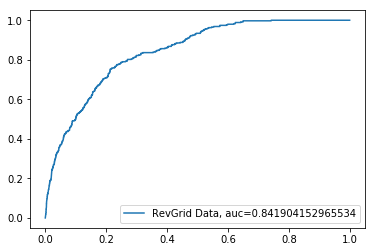

In [53]:
plt.plot(fpr,tpr,label="RevGrid Data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

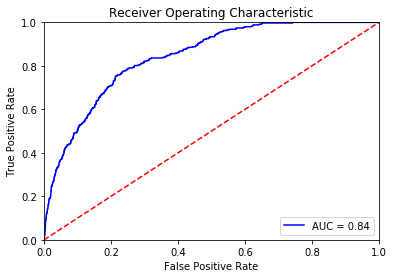

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
# subm = pd.DataFrame(test_data[""])

In [56]:
subm = {"V86":test_classes}
subm = pd.DataFrame(subm, test_data.index)
subm.head()

,V86
0,0
1,1
2,1
3,0
4,0


In [57]:
subm.to_csv("my_submission_11sep_rf.csv",index=False)

In [58]:
subm["V86"].value_counts()

0    2967
1    1033
Name: V86, dtype: int64

In [59]:
feat_imp_df=pd.DataFrame({'features':Tr_x.columns,'importance':modelrf.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
311,V47_6,0.165134
310,V47_0,0.094692
329,V68_0,0.088366
320,V59_4,0.049628
330,V68_1,0.037380
322,V59_2,0.028886
326,V65_0,0.027689
304,V43_7,0.021299
307,V44_2,0.017781
2,V1_8,0.017718


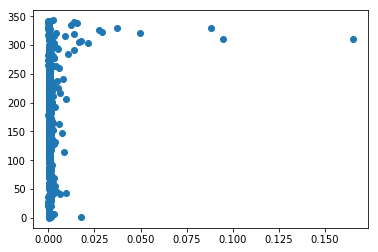

In [60]:
plt.plot(feat_imp_df["importance"],feat_imp_df.index,"o")